In [2]:
#!pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 347.1 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 391.6 kB/s eta 0:00:00
     -------------------------------------- 22.0/22.0 MB 176.0 kB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 118.8 kB/s eta 0:00:00


In [4]:
#!pip install folium

     ------------------------------------ 102.3/102.3 kB 311.0 kB/s eta 0:00:00


In [12]:
#!pip install geopy

     ------------------------------------ 119.8/119.8 kB 225.9 kB/s eta 0:00:00
     -------------------------------------- 40.3/40.3 kB 640.1 kB/s eta 0:00:00


In [4]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
from statsmodels.stats import weightstats



# Read the CSV file
df = pd.read_csv("London_flows.csv")

# Print the first 5 rows of the DataFrame
df.head()


,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [5]:

# Descriptive statistics
print("Descriptive Statistics:")
df.describe()


Descriptive Statistics:


,flows,population,jobs,distance
count,61474.000000,61474.000000,61474.000000,61474.000000
mean,25.090136,5532.198311,6136.424797,16314.843326
std,131.416761,8509.601663,10916.883647,9401.466906
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1554.000000,792.000000,8939.809178
50%,3.000000,2839.000000,1921.000000,15232.813070
75%,13.000000,5389.000000,6295.000000,22283.826200
max,15946.000000,67372.000000,78549.000000,60633.323740


In [6]:
# Correlation analysis
corr, _ = pearsonr(df["flows"], df["population"])
print(f"Pearson's correlation coefficient between flows and population: {corr:.2f}")


Pearson's correlation coefficient between flows and population: 0.21


In [17]:
boroughs

,CODE,OLDCODE,NAME,ALTNAME,geometry
0,E05000001,00AAFA,Aldersgate,NaN,"POLYGON ((-0.09740 51.52159, -0.09730 51.52158..."
1,E05000002,00AAFB,Aldgate,NaN,"POLYGON ((-0.07786 51.51581, -0.07730 51.51545..."
2,E05000003,00AAFC,Bassishaw,NaN,"POLYGON ((-0.09110 51.51804, -0.09002 51.51780..."
3,E05000004,00AAFD,Billingsgate,NaN,"POLYGON ((-0.08034 51.50801, -0.08052 51.50806..."
4,E05000005,00AAFE,Bishopsgate,NaN,"POLYGON ((-0.07847 51.52151, -0.07873 51.52104..."
...,...,...,...,...,...
644,E05000645,00BKGR,Tachbrook,NaN,"POLYGON ((-0.12848 51.48823, -0.12855 51.48809..."
645,E05000646,00BKGS,Vincent Square,NaN,"POLYGON ((-0.12468 51.49471, -0.12482 51.49370..."
646,E05000647,00BKGT,Warwick,NaN,"POLYGON ((-0.14263 51.49658, -0.14219 51.49563..."
647,E05000648,00BKGU,Westbourne,NaN,"POLYGON ((-0.19032 51.52492, -0.18689 51.52329..."


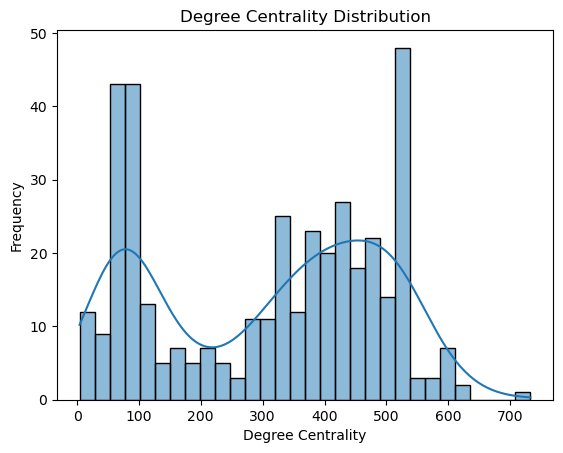

In [19]:

# Perform Centrality Analysis

# Calculate the degree centrality (in-degree + out-degree) for each station
in_degree_counts = df['station_destination'].value_counts()
out_degree_counts = df['station_origin'].value_counts()
total_degree_counts = in_degree_counts.add(out_degree_counts, fill_value=0)

# Plot the degree centrality distribution
sns.histplot(total_degree_counts, bins=30, kde=True)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Distribution')
plt.show()



Top 10 Stations with Highest Degree Centrality:
                  Station  Degree Centrality
25              Stratford           1.841709
61   Highbury & Islington           1.570352
90            Whitechapel           1.537688
4            Canary Wharf           1.532663
40           Canada Water           1.527638
1       Bank and Monument           1.527638
200      Liverpool Street           1.522613
5            Canning Town           1.512563
289         West Brompton           1.502513
76               Richmond           1.489950


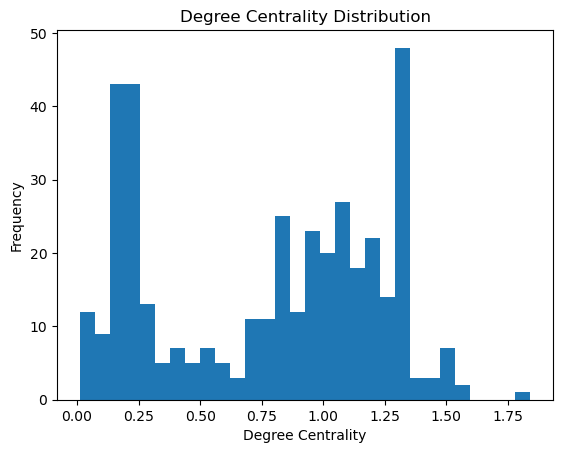

In [42]:

# Read the CSV file
df = pd.read_csv("London_flows.csv")

# Create a directed graph (DiGraph) from the DataFrame
G = nx.DiGraph()
G.add_edges_from(zip(df['station_origin'], df['station_destination']))

# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Convert centrality measures to DataFrame
centrality_df = pd.DataFrame({'Station': list(degree_centrality.keys()),
                              'Degree Centrality': list(degree_centrality.values()),
                              'Betweenness Centrality': list(betweenness_centrality.values()),
                              'Closeness Centrality': list(closeness_centrality.values())})

# Sort the DataFrame by degree centrality in descending order
centrality_df.sort_values('Degree Centrality', ascending=False, inplace=True)

# Print the top 10 stations with the highest degree centrality
print("Top 10 Stations with Highest Degree Centrality:")
print(centrality_df[['Station', 'Degree Centrality']].head(10))

# Plot the degree centrality distribution
plt.hist(centrality_df['Degree Centrality'], bins=30)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Distribution')
plt.show()

In [28]:
centrality_df[['Station', 'Degree Centrality']].head(10)

,Station,Degree Centrality
25,Stratford,1.841709
61,Highbury & Islington,1.570352
90,Whitechapel,1.537688
4,Canary Wharf,1.532663
40,Canada Water,1.527638
1,Bank and Monument,1.527638
200,Liverpool Street,1.522613
5,Canning Town,1.512563
289,West Brompton,1.502513
76,Richmond,1.489950


In [38]:
# Sort the DataFrame by betweenness centrality in descending order
centrality_df.sort_values('Betweenness Centrality', ascending=False, inplace=True)

# Print the top 10 stations with the highest betweenness centrality
print("Top 10 Stations with Highest Betweenness Centrality:")
centrality_df[['Station', 'Betweenness Centrality']].head(10)

centrality_df[['Station', 'Betweenness Centrality']].head(10)


Top 10 Stations with Highest Betweenness Centrality:


,Station,Betweenness Centrality
25,Stratford,0.101882
200,Liverpool Street,0.035123
4,Canary Wharf,0.028367
5,Canning Town,0.028243
1,Bank and Monument,0.027980
28,West Ham,0.023558
61,Highbury & Islington,0.023021
90,Whitechapel,0.020857
40,Canada Water,0.019486
22,Shadwell,0.016622


In [37]:

# Sort the DataFrame by closeness centrality in descending order
centrality_df.sort_values('Closeness Centrality', ascending=False, inplace=True)

# Print the top 10 stations with the highest closeness centrality
print("Top 10 Stations with Highest Closeness Centrality:")
centrality_df[['Station', 'Closeness Centrality']].head(10)


Top 10 Stations with Highest Closeness Centrality:


,Station,Closeness Centrality
25,Stratford,0.927739
61,Highbury & Islington,0.820619
90,Whitechapel,0.812245
40,Canada Water,0.810591
4,Canary Wharf,0.808943
1,Bank and Monument,0.807302
5,Canning Town,0.807302
200,Liverpool Street,0.805668
289,West Brompton,0.799197
76,Richmond,0.796000


In [36]:
# Sort the DataFrame by degree centrality, closeness centrality, and betweenness centrality in descending order
centrality_df.sort_values(['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality'],
                         ascending=False, inplace=True)

# Print the top 10 stations with the highest centrality values
print("Top 10 Stations with Highest Centrality:")
centrality_df.head(10)

Top 10 Stations with Highest Centrality:


,Station,Degree Centrality,Betweenness Centrality,Closeness Centrality
25,Stratford,1.841709,0.101882,0.927739
61,Highbury & Islington,1.570352,0.023021,0.820619
90,Whitechapel,1.537688,0.020857,0.812245
4,Canary Wharf,1.532663,0.028367,0.808943
40,Canada Water,1.527638,0.019486,0.810591
1,Bank and Monument,1.527638,0.027980,0.807302
200,Liverpool Street,1.522613,0.035123,0.805668
5,Canning Town,1.512563,0.028243,0.807302
289,West Brompton,1.502513,0.015103,0.799197
76,Richmond,1.489950,0.015787,0.796000


In [39]:

# Create a directed graph (DiGraph) from the DataFrame
G = nx.DiGraph()
G.add_edges_from(zip(df['station_origin'], df['station_destination']))

# Function to simulate station closure and calculate network performance
def simulate_station_closure(graph, station):
    # Create a copy of the original graph to simulate station closure
    G = graph.copy()
    G.remove_node(station)
    
    # Calculate connectivity and capacity of the modified graph
    connectivity = nx.number_weakly_connected_components(G)
    capacity = max(len(largest_cc) for largest_cc in nx.weakly_connected_components(G))
    
    return connectivity, capacity

# Perform vulnerability analysis by simulating station closures
vulnerability_df = pd.DataFrame({'station': G.nodes()})
vulnerability_df['connectivity'] = None
vulnerability_df['capacity'] = None

for station in G.nodes():
    connectivity, capacity = simulate_station_closure(G, station)
    vulnerability_df.loc[vulnerability_df['station'] == station, 'connectivity'] = connectivity
    vulnerability_df.loc[vulnerability_df['station'] == station, 'capacity'] = capacity

# Sort the vulnerability DataFrame by connectivity and capacity in ascending order
vulnerability_df.sort_values(['connectivity', 'capacity'], inplace=True)

# Print the vulnerability analysis results
print("Vulnerability Analysis Results:")
print(vulnerability_df)

Vulnerability Analysis Results:
               station connectivity capacity
0           Abbey Road            1      398
1    Bank and Monument            1      398
2              Beckton            1      398
3            Blackwall            1      398
4         Canary Wharf            1      398
..                 ...          ...      ...
394        Seven Kings            1      398
395          Shenfield            1      398
396   Clapham Junction            1      398
397     Crystal Palace            1      398
398       Emerson Park            1      398

[399 rows x 3 columns]


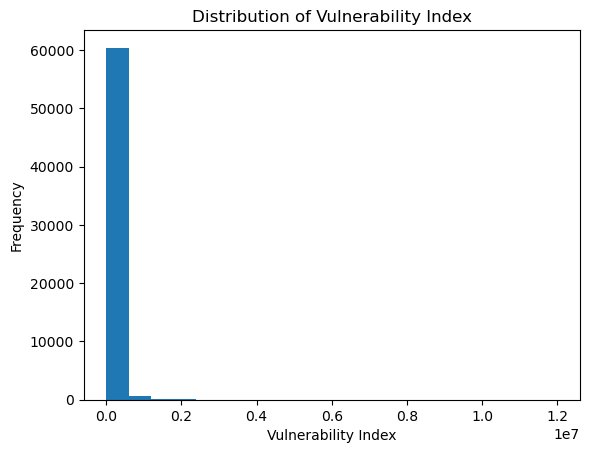

In [21]:

# Calculate the vulnerability index for each station
df['vulnerability_index'] = df['population'] * df['jobs'] / (df['station_origin'].map(total_degree_counts) + 1)

# Plot the vulnerability index distribution
df['vulnerability_index'].plot(kind='hist', bins=20)
plt.xlabel('Vulnerability Index')
plt.ylabel('Frequency')
plt.title('Distribution of Vulnerability Index')
plt.show()

In [72]:

# Read the CSV file
df = pd.read_csv("London_flows.csv")

# Create a directed graph (DiGraph) from the DataFrame
G = nx.DiGraph()
G.add_edges_from(zip(df['station_origin'], df['station_destination']))

# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Sort the stations by degree centrality in descending order
sorted_stations = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Perform vulnerability analysis
vulnerability_scores = []
for station in sorted_stations:
    # Remove the station from the graph
    G_copy = G.copy()
    G_copy.remove_node(station)
    
    # Calculate the largest strongly connected component (SCC)
    scc = max(nx.strongly_connected_components(G_copy), key=len)
    
    # Calculate the size of the largest strongly connected component (SCC)
    scc_size = len(scc)
    
    # Calculate the capacity of the largest strongly connected component (SCC)
    scc_capacity = sum(df[df['station_origin'].isin(scc)]['flows'])
    
    # Calculate the vulnerability score as the product of SCC size and SCC capacity
    vulnerability_score = scc_size * scc_capacity
    
    # Append the vulnerability score to the list
    vulnerability_scores.append({'station': station,
                                  'vulnerability_score': vulnerability_score})

# Convert vulnerability scores to DataFrame
vulnerability_df = pd.DataFrame(vulnerability_scores)

# Sort the DataFrame by vulnerability score in descending order
vulnerability_df.sort_values('vulnerability_score', ascending=False, inplace=True)

# Print the top 10 stations with the highest vulnerability scores
print("Top 10 Stations with Highest Vulnerability Scores:")
vulnerability_df.head(10)

Top 10 Stations with Highest Vulnerability Scores:


,station,vulnerability_score
384,Battersea Park,613871618
336,West India Quay,613807142
366,Cheshunt,613803560
342,Bushey,613776894
397,Shenfield,613772914
373,South Hampstead,613772914
72,Hyde Park Corner,613768536
376,Beckton Park,613755004
361,Cambridge Heath,613741074
398,Emerson Park,613738288


In [74]:

# Create a directed graph (DiGraph) from the DataFrame
G = nx.DiGraph()
G.add_edges_from(zip(df['station_origin'], df['station_destination']))

# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Sort the stations by degree centrality in descending order
sorted_stations = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Select the top 10 stations from the centrality analysis
top_10_stations = sorted_stations[:10]

# Perform vulnerability analysis for the top 10 stations
vulnerability_scores = []
for station in top_10_stations:
    # Remove the station from the graph
    G_copy = G.copy()
    G_copy.remove_node(station)
    
    # Calculate the largest strongly connected component (SCC)
    scc = max(nx.strongly_connected_components(G_copy), key=len)
    
    # Calculate the size of the largest strongly connected component (SCC)
    scc_size = len(scc)
    
    # Calculate the capacity of the largest strongly connected component (SCC)
    scc_capacity = sum(df[df['station_origin'].isin(scc)]['flows'])
    
    # Calculate the vulnerability score as the product of SCC size and SCC capacity
    vulnerability_score = scc_size * scc_capacity
    
    # Append the vulnerability score to the list
    vulnerability_scores.append({'station': station,
                                  'vulnerability_score': vulnerability_score})

# Convert vulnerability scores to DataFrame
vulnerability_df2 = pd.DataFrame(vulnerability_scores)

# Sort the DataFrame by vulnerability score in descending order
vulnerability_df2.sort_values('vulnerability_score', ascending=False, inplace=True)

# Print the top 10 stations with the highest vulnerability scores
print("Top 10 Stations with Highest Vulnerability Scores:")
vulnerability_df2.head(10)

Top 10 Stations with Highest Vulnerability Scores:


,station,vulnerability_score
8,West Brompton,612346880
9,Richmond,611819132
2,Whitechapel,608983780
3,Canary Wharf,608048082
7,Canning Town,605463868
1,Highbury & Islington,604433446
5,Canada Water,603115270
4,Bank and Monument,602133006
6,Liverpool Street,601345364
0,Stratford,590265840


In [84]:
import networkx as nx

# Load the directed graph from DataFrame
G = nx.DiGraph()
G.add_edges_from(zip(df['station_origin'], df['station_destination']))

# Perform non-sequential node removal strategy
def non_sequential_node_removal(G, nodes_to_remove):
    """
    Perform non-sequential node removal strategy.
    
    Args:
        G (nx.DiGraph): The input directed graph.
        nodes_to_remove (list): List of nodes to be removed.
        
    Returns:
        G_removed (nx.DiGraph): The directed graph with removed nodes.
    """
    G_removed = G.copy()
    for node in nodes_to_remove:
        if node in G_removed.nodes():
            # Remove the node and its incoming/outgoing edges
            G_removed.remove_node(node)
    return G_removed

# Perform sequential node removal strategy
def sequential_node_removal(G, num_nodes_to_remove):
    """
    Perform sequential node removal strategy.
    
    Args:
        G (nx.DiGraph): The input directed graph.
        num_nodes_to_remove (int): Number of nodes to be removed.
        
    Returns:
        G_removed (nx.DiGraph): The directed graph with removed nodes.
    """
    G_removed = G.copy()
    for i in range(num_nodes_to_remove):
        # Calculate the vulnerability score for each remaining node
        vulnerability_scores = {}
        for node in G_removed.nodes():
            G_copy = G_removed.copy()
            G_copy.remove_node(node)
            scc = max(nx.strongly_connected_components(G_copy), key=len)
            scc_size = len(scc)
            scc_capacity = sum(df[df['station_origin'].isin(scc)]['flows'])
            vulnerability_scores[node] = scc_size * scc_capacity
        
        # Find the node with the highest vulnerability score
        node_to_remove = max(vulnerability_scores, key=vulnerability_scores.get)
        
        # Remove the node and its incoming/outgoing edges
        G_removed.remove_node(node_to_remove)
    return G_removed

# Example usage of non-sequential node removal strategy
nodes_to_remove_nonseq = top_10_stations[:3]  # List of nodes to remove non-sequentially
G_removed_nonseq = non_sequential_node_removal(G, nodes_to_remove_nonseq)
print("Nodes removed using non-sequential strategy:", nodes_to_remove_nonseq)


Nodes removed using non-sequential strategy: ['Stratford', 'Highbury & Islington', 'Whitechapel']


In [90]:

# Define a function for sequential node removal
def sequential_node_removal(G, num_nodes):
    """
    Remove nodes from a graph sequentially based on degree centrality.
    
    Args:
        G (nx.DiGraph): Directed graph
        num_nodes (int): Number of nodes to remove
        
    Returns:
        list: List of nodes removed
    """
    nodes_to_remove = []
    for i in range(num_nodes):
        degree_centrality = nx.degree_centrality(G)
        sorted_stations = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
        node_to_remove = sorted_stations[3]
        G.remove_node(node_to_remove)
        nodes_to_remove.append(node_to_remove)
    return nodes_to_remove

# Number of nodes to remove using sequential strategy
num_nodes_to_remove_seq = 3
G_removed_seq = sequential_node_removal(G, num_nodes_to_remove_seq)

print("Nodes removed using sequential strategy:", G_removed_seq)


Nodes removed using sequential strategy: ['Embankment', 'High Street Kensington', 'Oxford Circus']


In [23]:
# Perform Pearson's correlation analysis

# Calculate Pearson's correlation coefficient between flows and distance
correlation, p_value = pearsonr(df['flows'], df['distance'])
print(f"Pearson's correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

# Perform Variance Inflation Factor (VIF) analysis

# Prepare the data for VIF analysis
vif_data = df[['flows', 'population', 'jobs', 'distance']]

# Calculate VIF for each variable
vif = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])],
                index=vif_data.columns)

print('Variance Inflation Factor (VIF) for each variable:')
print(vif)


Pearson's correlation coefficient: -0.16
P-value: 0.00
Variance Inflation Factor (VIF) for each variable:
flows         1.195096
population    1.346992
jobs          1.284515
distance      1.402618
dtype: float64


C:\Users\NSBVITALIS\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:135: RuntimeWarning: invalid value encountered in scalar divide
  return self.sum / self.sum_weights
C:\Users\NSBVITALIS\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:997: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(var_pooled * (1.0 / d1.nobs + 1.0 / d2.nobs))
C:\Users\NSBVITALIS\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:997: RuntimeWarning: invalid value encountered in scalar multiply
  return np.sqrt(var_pooled * (1.0 / d1.nobs + 1.0 / d2.nobs))


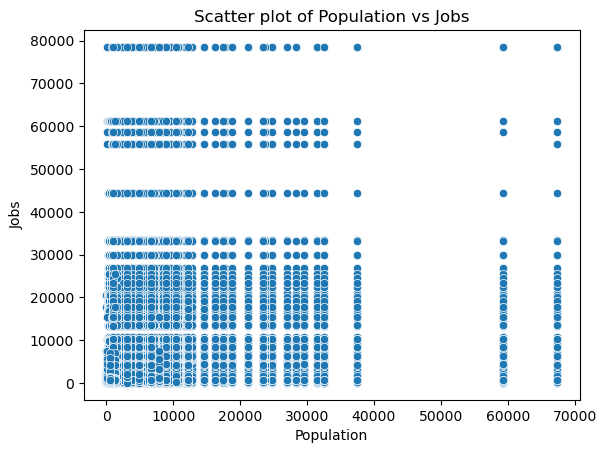

In [16]:

# Load a shapefile for London borough boundaries using geopandas
boroughs = gpd.read_file("london_wards_2011_wgs84.shp")

# Perform statistical analysis on the 'flows' column
flows_mean = df['flows'].mean()
flows_median = df['flows'].median()
flows_std = df['flows'].std()

# Perform a t-test using statsmodels
flows_borough1 = df[df['station_origin'] == 'Borough1']['flows']
flows_borough2 = df[df['station_origin'] == 'Borough2']['flows']
t_stat, p_value, _ = st.ttest_ind(flows_borough1, flows_borough2)

# Perform a Pearson correlation between 'population' and 'jobs' columns
population = df['population']
jobs = df['jobs']
corr, p_value = pearsonr(population, jobs)

# Create a scatter plot using seaborn
sns.scatterplot(x='population', y='jobs', data=df)
plt.title('Scatter plot of Population vs Jobs')
plt.xlabel('Population')
plt.ylabel('Jobs')
plt.show()


In [54]:
import pandas as pd
from scipy.optimize import minimize

# Read the CSV file
df = pd.read_csv("London_flows.csv")

# Define the Gravity Model function
def gravity_model(params):
    # Extract the model parameters
    alpha, beta = params
    
    # Calculate the expected flows based on the model parameters
    expected_flows = alpha * (df['population'] ** beta) * (df['jobs'] ** beta)
    
    # Calculate the residuals
    residuals = df['flows'] - expected_flows
    
    # Calculate the sum of squared residuals
    sum_of_squared_residuals = (residuals ** 2).sum()
    
    return sum_of_squared_residuals

# Define the initial guess for the model parameters
initial_guess = [1, 0.5]

# Minimize the sum of squared residuals to estimate the model parameters
result = minimize(gravity_model, initial_guess, method='Nelder-Mead')

# Extract the estimated model parameters
alpha_hat, beta_hat = result.x

# Print the estimated model parameters
print("Estimated Model Parameters:")
print("alpha_hat =", alpha_hat)
print("beta_hat =", beta_hat)

Estimated Model Parameters:
alpha_hat = 1.335384328908654e-07
beta_hat = 1.0838086910906046


In [56]:

# Calculate the expected flows using the estimated model parameters
expected_flows = alpha_hat * (df['population'] ** beta_hat) * (df['jobs'] ** beta_hat)

# Calculate the residuals
residuals = df['flows'] - expected_flows

# Calculate R-squared
observed_mean = df['flows'].mean()
total_sum_of_squares = ((df['flows'] - observed_mean) ** 2).sum()
residual_sum_of_squares = (residuals ** 2).sum()
r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)

# Calculate RMSE
rmse = sqrt((residuals ** 2).mean())

# Print R-squared and RMSE
print("R-squared:", r_squared)
print("RMSE:", rmse)

R-squared: 0.3655146520607313
RMSE: 104.67862893748735


In [61]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("London_flows.csv")

# Update number of jobs at Canary Wharf with 50% decrease
canary_wharf_idx = df[df['station_origin'] == 'Canary Wharf'].index[0]
df.at[canary_wharf_idx, 'jobs'] *= 0.5

# Extract the calibrated model parameters
alpha_hat = alpha_hat
beta_hat = beta_hat

# Calculate the new expected flows with updated jobs at Canary Wharf
expected_flows = alpha_hat * (df['population'] ** beta_hat) * (df['jobs'] ** beta_hat)

# Normalize the new expected flows to conserve the total number of commuters
total_commuters_before = df['flows'].sum()
total_commuters_after = expected_flows.sum()
expected_flows *= total_commuters_before / total_commuters_after

# Update the flows in the dataset with the new expected flows
df['flows'] = expected_flows

# Print the updated flows for scenario A
print("Updated flows for scenario A:")
print(df[['station_origin', 'flows']])

Updated flows for scenario A:
         station_origin      flows
0            Abbey Road  39.455874
1            Abbey Road   0.236683
2            Abbey Road   0.354305
3            Abbey Road  29.627613
4            Abbey Road   7.906913
...                 ...        ...
61469  Woolwich Arsenal  22.276199
61470  Woolwich Arsenal  36.350570
61471  Woolwich Arsenal   2.737012
61472  Woolwich Arsenal   6.050094
61473  Woolwich Arsenal   8.433686

[61474 rows x 2 columns]


In [62]:
import pandas as pd
from math import sqrt

# Read the CSV file
df = pd.read_csv("London_flows.csv")

# Define the calibrated model parameters
alpha_hat = alpha_hat
beta_hat = beta_hat

# Find the row corresponding to Canary Wharf and update the jobs column
canary_wharf_row = df[df['station_origin'] == 'Canary Wharf']
canary_wharf_jobs = canary_wharf_row['jobs'].values[0]
canary_wharf_row['jobs'] = canary_wharf_jobs * 0.5

# Calculate the expected flows for scenario A
expected_flows_scenario_a = alpha_hat * (df['population'] ** beta_hat) * (df['jobs'] ** beta_hat)

# Normalize the expected flows to conserve the number of commuters
total_expected_flows_scenario_a = expected_flows_scenario_a.sum()
total_observed_flows = df['flows'].sum()
expected_flows_scenario_a *= total_observed_flows / total_expected_flows_scenario_a

# Calculate the residuals
residuals_scenario_a = df['flows'] - expected_flows_scenario_a

# Calculate R-squared for scenario A
observed_mean = df['flows'].mean()
total_sum_of_squares = ((df['flows'] - observed_mean) ** 2).sum()
residual_sum_of_squares_scenario_a = (residuals_scenario_a ** 2).sum()
r_squared_scenario_a = 1 - (residual_sum_of_squares_scenario_a / total_sum_of_squares)

# Calculate RMSE for scenario A
rmse_scenario_a = sqrt((residuals_scenario_a ** 2).mean())

# Print results for scenario A
print("Expected Flows (Scenario A):")
print(expected_flows_scenario_a)
print("R-squared (Scenario A):", r_squared_scenario_a)
print("RMSE (Scenario A):", rmse_scenario_a)

Expected Flows (Scenario A):
0        39.455818
1         0.236683
2         0.354304
3        29.627571
4         7.906902
           ...    
61469    22.276168
61470    36.350519
61471     2.737008
61472     6.050085
61473     8.433675
Length: 61474, dtype: float64
R-squared (Scenario A): 0.35486519270436057
RMSE (Scenario A): 105.55345762010367


C:\Users\NSBVITALIS\AppData\Local\Temp\ipykernel_10760\4058886470.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canary_wharf_row['jobs'] = canary_wharf_jobs * 0.5


In [63]:
import pandas as pd
from math import sqrt

# Read the CSV file
df = pd.read_csv("London_flows.csv")

# Define the cost function parameters for Scenario B
cost_param1 = 0.5
cost_param2 = 1.2

# Define the cost function
def cost_function(distance, cost_param1, cost_param2):
    return (distance ** cost_param1) * cost_param2

# Calculate the expected flows for Scenario B
expected_flows_scenario_b = alpha_hat * (df['population'] ** beta_hat) * (df['jobs'] ** beta_hat) * cost_function(df['distance'], cost_param1, cost_param2)

# Normalize the expected flows to conserve the number of commuters
total_expected_flows_scenario_b = expected_flows_scenario_b.sum()
expected_flows_scenario_b *= total_observed_flows / total_expected_flows_scenario_b

# Calculate the residuals
residuals_scenario_b = df['flows'] - expected_flows_scenario_b

# Calculate R-squared for Scenario B
residual_sum_of_squares_scenario_b = (residuals_scenario_b ** 2).sum()
r_squared_scenario_b = 1 - (residual_sum_of_squares_scenario_b / total_sum_of_squares)

# Calculate RMSE for Scenario B
rmse_scenario_b = sqrt((residuals_scenario_b ** 2).mean())

# Print results for Scenario B
print("Expected Flows (Scenario B):")
print(expected_flows_scenario_b)
print("R-squared (Scenario B):", r_squared_scenario_b)
print("RMSE (Scenario B):", rmse_scenario_b)

Expected Flows (Scenario B):
0        35.255864
1         0.216356
2         0.215722
3        20.938255
4         3.699033
           ...    
61469    25.553846
61470    33.600121
61471     2.648561
61472     4.387181
61473     8.339601
Length: 61474, dtype: float64
R-squared (Scenario B): 0.24967914609249642
RMSE (Scenario B): 113.83366941658143
